# Comparison of machine learning models
This notebook contains the code for visualizing a bar plot of the model performances (as determined by $R^2$ and MAE). These statistics were taken from the mean of 100 training-testing splits using the baseline SardiNIA study.

In [1]:
import numpy as np
import matplotlib.pyplot as pl
from scipy.stats import pearsonr
import pandas as pd
import glob as gb
import csv

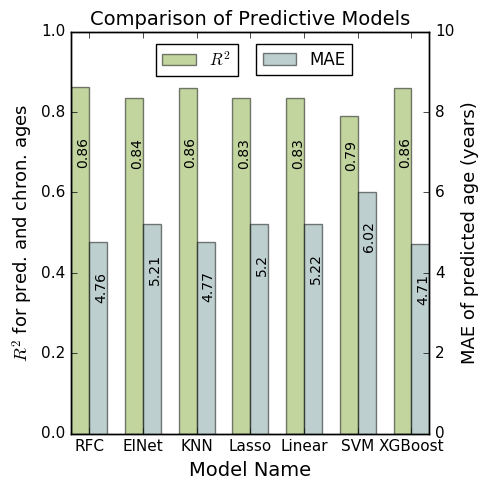

In [18]:
model_names = ['RFC', 'ElNet', 'KNN', 'Lasso', 'Linear', 'SVM', 'XGBoost']
#model_names = ['Random Forest', 'K-Nearest', 'Elastic Net', 'Lasso', 'Linear', 'SVM', 'XGBoost']
model_R2 = [0.8630, 0.8352, 0.8585, 0.8350, 0.8348, 0.7905, 0.8603]
model_MAE = [4.758, 5.208, 4.7677, 5.2013, 5.2158, 6.0155, 4.7102] # from 100 splits
ax = pl.figure(figsize=(5,5)).gca()
ax2 = ax.twinx()
bar1 = ax.bar(np.arange(len(model_names))*1.5, model_R2, color='#86AC41', align='center', alpha=0.5, width=0.5, label='$R^2$')
bar2 = ax2.bar(np.arange(len(model_names))*1.5+0.5, model_MAE, color='#7DA3A1', align='center', alpha=0.5, width=0.5, label='MAE')
model_R2 = [ round(elem, 2) for elem in model_R2 ]
for a,b in zip(np.arange(len(model_names))*1.5, model_R2):
    pl.text(a-0.12, b+6.25, str(b), size=10, rotation=90)
model_MAE = [ round(elem, 2) for elem in model_MAE ]
for a,b in zip(np.arange(len(model_names))*1.5, model_MAE):
    pl.text(a+0.38, b-1, str(b), size=10, rotation=90)
pl.xticks(np.arange(len(model_names))*1.5+0.25, model_names, rotation=90)
ax.set_xlabel ('Model Name', fontsize=14)
ax.set_ylabel ('$R^2$ for pred. and chron. ages', fontsize=13)
ax.set_ylim(0,1)
ax2.set_ylabel ('MAE of predicted age (years)', fontsize=13)
ax2.set_ylim(0,10)
ax.set_title ('Comparison of Predictive Models', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=11)
ax.tick_params(axis='both', which='minor', labelsize=11)
ax2.tick_params(axis='both', which='major', labelsize=11)
ax2.tick_params(axis='both', which='minor', labelsize=11)
pl.xlim(np.min(np.arange(len(model_names))*1.5)-0.25, np.max(np.arange(len(model_names))*1.5)+0.75)
#ax.legend(loc='center left', bbox_to_anchor=(1.1, 0.55), fontsize=12)
#ax2.legend(loc='center left', bbox_to_anchor=(1.1, 0.45), fontsize=12)
ax.legend(loc='upper center', bbox_to_anchor=(0.35, 0.99), fontsize=12)
ax2.legend(loc='upper center', bbox_to_anchor=(0.65, 0.99), fontsize=12)
pl.tight_layout()
#pl.axis([-1, len(model_names)+1, 0, 1])
pl.savefig('./Figures/model_comparison_bar.png', dpi=800, bbox_inches='tight')
pl.show()